### three candidates for projected atmospheric forcing dataset

In [2]:
from os.path import expanduser
home = expanduser("~/")
import os
from pylab import *
from scipy.stats import spearmanr,pearsonr
from scipy.interpolate import griddata
import xarray as xr
import time
import calendar
import multiprocessing as mp
import functools
import scipy.stats
import glob
from dask.distributed import Client,LocalCluster
from scipy import signal
import pandas as pd
#client = Client()
#client

In [5]:
cmip6 = [
    'ACCESS-CM2', 
    'ACCESS-ESM1-5', 
    'AWI-CM-1-1-MR', 
    'BCC-CSM2-MR', 
    'CESM2-WACCM', 
    'CIESM', 
    'CMCC-CM2-SR5',
    'CMCC-ESM2',    
    'CanESM5', 
    'EC-Earth3', 
    'EC-Earth3-Veg', 
    'FGOALS-f3-L', 
    'FGOALS-g3', 
    'FIO-ESM-2-0', 
    'GFDL-ESM4', 
    'INM-CM4-8', 
    'INM-CM5-0', 
    'IPSL-CM6A-LR', 
    'KACE-1-0-G', 
    'MIROC6', 
    'MPI-ESM1-2-HR', 
    'MPI-ESM1-2-LR', 
    'MRI-ESM2-0', 
    'NESM3', 
    'NorESM2-LM',
    'NorESM2-MM',
    'MMM-CMIP6'
]
size(cmip6)

27

### licalvf of JRA55-do

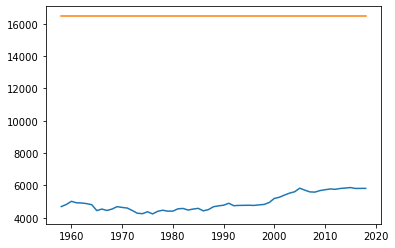

In [3]:
figure()
#annual mean solid runoff integrated over n60 (s60)
ds = xr.open_dataset('/home/581/hh0162/data/projects/cmip/jra55v1.4.0/licalvf/licalvf_sum_n60_JRA55-do_1958-2018.nc')
n60 = squeeze(ds.licalvf)*86400
ds = xr.open_dataset('/home/581/hh0162/data/projects/cmip/jra55v1.4.0/licalvf/licalvf_sum_s60_JRA55-do_1958-2018.nc')
s60 = squeeze(ds.licalvf)*86400
plot(range(1958,2018+1),n60,label='N60')
plot(range(1958,2018+1),s60,label='S60')

In [4]:
array((max(n60)-min(n60))/mean(n60))

array(0.3296164)

### 20210623: recalculate global and polar warming by accounting only over ocean grid cells.

<ipython-input-7-cea97bb16b65>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot(321)
<ipython-input-7-cea97bb16b65>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot(323)
<ipython-input-7-cea97bb16b65>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwh

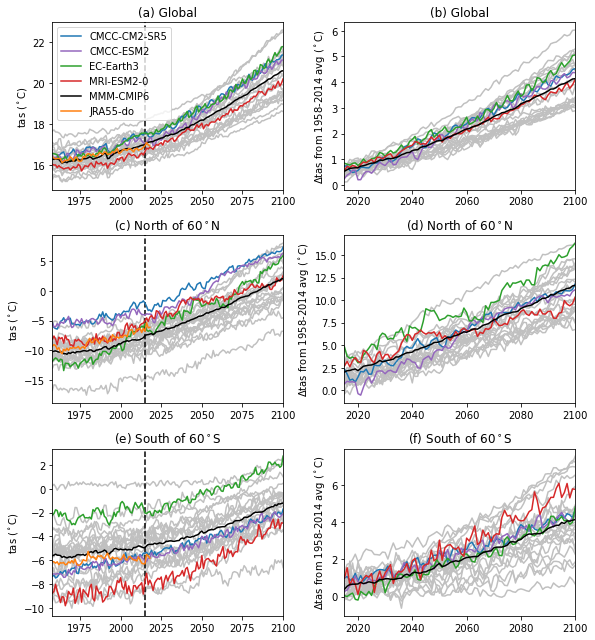

In [7]:
figure(figsize=(8.5,9))
for it in range(size(cmip6)):
    ds = xr.open_mfdataset('../tas/r640x320/'+'areaweighted_avg_*_'+cmip6[it]+'_*.nc',combine='by_coords')
    glo = squeeze(ds.glo)-273.15
    n60 = squeeze(ds.n60)-273.15
    s60 = squeeze(ds.s60)-273.15
    ds = xr.open_mfdataset('../../cmip6_historical/r640x320/'+'areaweighted_avg_*_'+cmip6[it]+'_*.nc',combine='by_coords')
    glo_h = squeeze(ds.glo)-273.15
    n60_h = squeeze(ds.n60)-273.15
    s60_h = squeeze(ds.s60)-273.15
#    if cmip6[it] == 'ACCESS-CM2':
#        iro = 'tab:blue'
    if cmip6[it] == 'CMCC-CM2-SR5':
        iro = 'tab:blue'
    elif cmip6[it] == 'CMCC-ESM2':
        iro = 'tab:purple'    
    elif cmip6[it] == 'EC-Earth3':
        iro = 'tab:green'
    elif cmip6[it] == 'MRI-ESM2-0':
        iro = 'tab:red'
    elif cmip6[it] == 'MMM-CMIP6':
        iro = 'black'
    else:
        iro = 'silver'
    if iro == 'silver':
        raberu = '_nolabel_'
        ichi = 1
    else:
        raberu = cmip6[it]
        ichi = 2
    subplot(321)
    plot(arange(1958,2100+1),concatenate((glo_h,glo)),iro,label=raberu,zorder=ichi)
    subplot(323)
    plot(arange(1958,2100+1),concatenate((n60_h,n60)),iro,label=raberu,zorder=ichi)
    subplot(325)
    plot(arange(1958,2100+1),concatenate((s60_h,s60)),iro,label=raberu,zorder=ichi)
    subplot(322)
    plot(arange(2015,2100+1),glo-mean(glo_h),iro,label=raberu,zorder=ichi)
    subplot(324)
    plot(arange(2015,2100+1),n60-mean(n60_h),iro,label=raberu,zorder=ichi)
    subplot(326)
    plot(arange(2015,2100+1),s60-mean(s60_h),iro,label=raberu,zorder=ichi)
#JRA55
ds = xr.open_mfdataset('/home/581/hh0162/data/projects/cmip/jra55v1.4.0/tas/r640x320/areaweighted_avg_*.nc',combine='by_coords')
glo = squeeze(ds.glo)-273.15
n60 = squeeze(ds.n60)-273.15
s60 = squeeze(ds.s60)-273.15
iro = 'tab:orange'
raberu = 'JRA55-do'
ichi = 2
subplot(321)
plot(arange(1958,2018+1),glo,iro,label=raberu,zorder=ichi)
subplot(323)
plot(arange(1958,2018+1),n60,iro,label=raberu,zorder=ichi)
subplot(325)
plot(arange(1958,2018+1),s60,iro,label=raberu,zorder=ichi)

subplot(321)
legend(fontsize='medium')   
title('(a) Global')
ylabel('tas ($^\circ$C)')
subplot(322)
title('(b) Global')
ylabel('$\Delta$tas from 1958-2014 avg ($^\circ$C)')
subplot(323)
title('(c) North of 60$^\circ$N')
ylabel('tas ($^\circ$C)')
subplot(324)
title('(d) North of 60$^\circ$N')
ylabel('$\Delta$tas from 1958-2014 avg ($^\circ$C)')
subplot(325)
title('(e) South of 60$^\circ$S')
ylabel('tas ($^\circ$C)')
subplot(326)
title('(f) South of 60$^\circ$S')
ylabel('$\Delta$tas from 1958-2014 avg ($^\circ$C)')

for it in range(6):
    subplot(3,2,it+1)
    if it+1 in [1,3,5]:
        xlim(1958,2100)
        axvline(x=2015,linestyle='--',color='k',zorder=1)
    else:
        xlim(2015,2100)
        

tight_layout()
savefig('fig_tas_CMIP6_SSP585_overoceangrids.pdf',dpi=300,bbox_tight='True')

### compare global and polar warming, including values over land (old)

/apps/jupyterlab/2.1.4-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/apps/jupyterlab/2.1.4-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/apps/jupyterlab/2.1.4-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curren

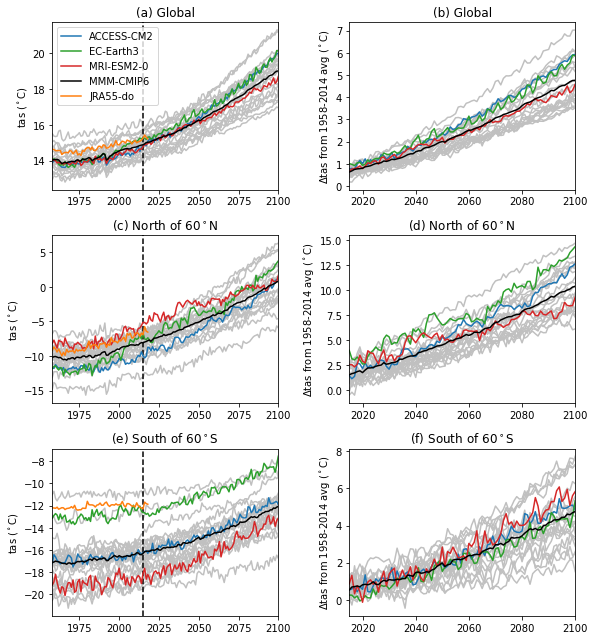

In [5]:
figure(figsize=(8.5,9))
for it in range(size(cmip6)):
    ds = xr.open_mfdataset('../tas/r640x320/'+'avg_*_'+cmip6[it]+'_*.nc',combine='by_coords')
    glo = squeeze(ds.glo_tas)-273.15
    n60 = squeeze(ds.n60_tas)-273.15
    s60 = squeeze(ds.s60_tas)-273.15
    ds = xr.open_mfdataset('../../cmip6_historical/r640x320/'+'avg_*_'+cmip6[it]+'_*.nc',combine='by_coords')
    glo_h = squeeze(ds.glo_tas)-273.15
    n60_h = squeeze(ds.n60_tas)-273.15
    s60_h = squeeze(ds.s60_tas)-273.15
    if cmip6[it] == 'ACCESS-CM2':
        iro = 'tab:blue'
    elif cmip6[it] == 'EC-Earth3':
        iro = 'tab:green'
    elif cmip6[it] == 'MRI-ESM2-0':
        iro = 'tab:red'
    elif cmip6[it] == 'MMM-CMIP6':
        iro = 'black'
    else:
        iro = 'silver'
    if iro == 'silver':
        raberu = '_nolabel_'
        ichi = 1
    else:
        raberu = cmip6[it]
        ichi = 2
    subplot(321)
    plot(arange(1958,2100+1),concatenate((glo_h,glo)),iro,label=raberu,zorder=ichi)
    subplot(323)
    plot(arange(1958,2100+1),concatenate((n60_h,n60)),iro,label=raberu,zorder=ichi)
    subplot(325)
    plot(arange(1958,2100+1),concatenate((s60_h,s60)),iro,label=raberu,zorder=ichi)
    subplot(322)
    plot(arange(2015,2100+1),glo-mean(glo_h),iro,label=raberu,zorder=ichi)
    subplot(324)
    plot(arange(2015,2100+1),n60-mean(n60_h),iro,label=raberu,zorder=ichi)
    subplot(326)
    plot(arange(2015,2100+1),s60-mean(s60_h),iro,label=raberu,zorder=ichi)
#JRA55
ds = xr.open_mfdataset('/home/581/hh0162/data/projects/cmip/jra55v1.4.0/tas/r640x320/avg_*.nc',combine='by_coords')
glo = squeeze(ds.glo_tas)-273.15
n60 = squeeze(ds.n60_tas)-273.15
s60 = squeeze(ds.s60_tas)-273.15
iro = 'tab:orange'
raberu = 'JRA55-do'
ichi = 2
subplot(321)
plot(arange(1958,2018+1),glo,iro,label=raberu,zorder=ichi)
subplot(323)
plot(arange(1958,2018+1),n60,iro,label=raberu,zorder=ichi)
subplot(325)
plot(arange(1958,2018+1),s60,iro,label=raberu,zorder=ichi)

subplot(321)
legend(fontsize='medium')   
title('(a) Global')
ylabel('tas ($^\circ$C)')
subplot(322)
title('(b) Global')
ylabel('$\Delta$tas from 1958-2014 avg ($^\circ$C)')
subplot(323)
title('(c) North of 60$^\circ$N')
ylabel('tas ($^\circ$C)')
subplot(324)
title('(d) North of 60$^\circ$N')
ylabel('$\Delta$tas from 1958-2014 avg ($^\circ$C)')
subplot(325)
title('(e) South of 60$^\circ$S')
ylabel('tas ($^\circ$C)')
subplot(326)
title('(f) South of 60$^\circ$S')
ylabel('$\Delta$tas from 1958-2014 avg ($^\circ$C)')

for it in range(6):
    subplot(3,2,it+1)
    if it+1 in [1,3,5]:
        xlim(1958,2100)
        axvline(x=2015,linestyle='--',color='k',zorder=1)
    else:
        xlim(2015,2100)
        
#piControl EC-Earth3
#subplot(321)
#ds = xr.open_mfdataset('/home/581/hh0162/data/projects/cmip/cmip6_piControl/tas/r640x320/avg_*_EC-Earth3_*.nc',combine='by_coords')
#glo = squeeze(ds.glo_tas)-273.15
#n60 = squeeze(ds.n60_tas)-273.15
#s60 = squeeze(ds.s60_tas)-273.15
#iro = 'tab:pink'
#raberu = 'EC-Earth3 piC'
#ichi = 2
#axhspan(min(glo),max(glo),facecolor='tab:green',alpha=0.5)
#subplot(323)
#axhspan(min(n60),max(n60),facecolor='tab:green',alpha=0.5)
#subplot(325)
#axhspan(min(s60),max(s60),facecolor='tab:green',alpha=0.5)

tight_layout()
savefig('fig_tas_CMIP6_SSP585.pdf',dpi=300,bbox_tight='True')

### major climate indices

<ipython-input-8-88099997f00e>:94: RuntimeWarning: divide by zero encountered in true_divide
  semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi,label='_nolabel_')
<ipython-input-8-88099997f00e>:97: RuntimeWarning: divide by zero encountered in true_divide
  semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)
<ipython-input-8-88099997f00e>:100: RuntimeWarning: divide by zero encountered in true_divide
  semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)
<ipython-input-8-88099997f00e>:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  subplot(321)
<ipython-input-8-88099997f00e>:83: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instan

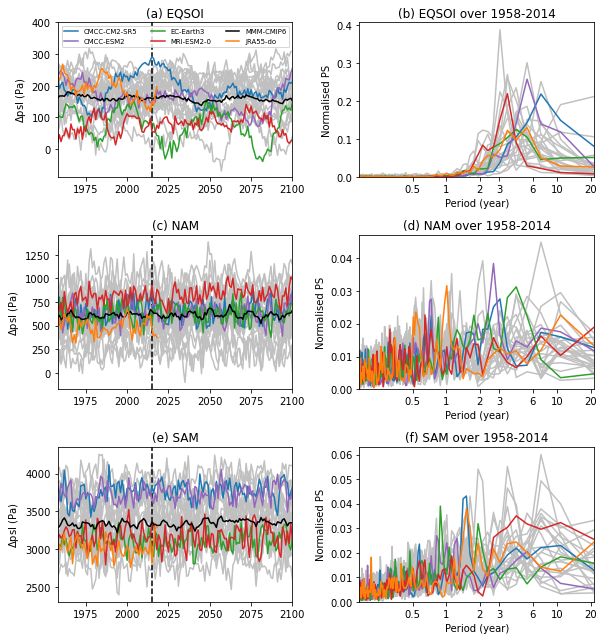

In [8]:
figure(figsize=(8.5,9))

for it in range(size(cmip6)):    
    ds = xr.open_mfdataset('../psl/r640x320/'+'indices_*_'+cmip6[it]+'_*.nc',combine='by_coords')
    ds_h = xr.open_mfdataset('../../cmip6_historical/r640x320/'+'indices_*_'+cmip6[it]+'_*.nc',combine='by_coords')

    #EQSOI
    
    #monthly-mean time series over 1958-2100
    ds_mon = concatenate((array(squeeze(ds_h.eqsoi)),array(squeeze(ds.eqsoi))))
    #seasonal-mean time series over 1958-2100
    soi_sea = ds_mon#mean(reshape(ds_mon,(3,(2100-1958+1)*4)),axis=0)
    #soi_sa = soi_sea / std(soi_sea[:(2014-1958+1)*12])
    #seasonal-mean climatology over 1958-2014
    ds_cli = mean(reshape(soi_sea[:(2014-1958+1)*12],((2014-1958+1),12)),axis=0)
    #seasonal-mean anomaly over 1958-2100
    ds_ano = reshape(reshape(soi_sea,((2100-1958+1),12)) - ds_cli[newaxis,:], 12*(2100-1958+1))
    #standardized anomaly over 1958-2100 (standardised relative to 1958-2014)
    soi_sa = ds_ano / std(ds_ano[:(2014-1958+1)*12])

    #NAM
    
    #monthly-mean time series
    ds_mon = concatenate((array(squeeze(ds_h.nam)),array(squeeze(ds.nam))))
    #seasonal-mean time series over 1958-2100
    nam_sea = ds_mon#mean(reshape(ds_mon,(3,(2100-1958+1)*4)),axis=0)
    #nam_sa = nam_sea / std(nam_sea[:(2014-1958+1)*12])
    #seasonal-mean climatology over 1958-2014
    ds_cli = mean(reshape(nam_sea[:(2014-1958+1)*12],((2014-1958+1),12)),axis=0)
    #seasonal-mean anomaly over 1958-2100
    ds_ano = reshape(reshape(nam_sea,((2100-1958+1),12)) - ds_cli[newaxis,:], 12*(2100-1958+1))
    #standardized anomaly over 1958-2100 (standardised relative to 1958-2014)
    nam_sa = ds_ano / std(ds_ano[:(2014-1958+1)*12])

    #SAM
    
    #monthly-mean time series
    ds_mon = concatenate((array(squeeze(ds_h.sam)),array(squeeze(ds.sam))))
    #seasonal-mean time series over 1958-2100
    sam_sea = ds_mon#mean(reshape(ds_mon,(3,(2100-1958+1)*4)),axis=0)
    #sam_sa = sam_sea / std(sam_sea[:(2014-1958+1)*12])
    #seasonal-mean climatology over 1958-2014
    ds_cli = mean(reshape(sam_sea[:(2014-1958+1)*12],((2014-1958+1),12)),axis=0)
    #seasonal-mean anomaly over 1958-2100
    ds_ano = reshape(reshape(sam_sea,((2100-1958+1),12)) - ds_cli[newaxis,:], 12*(2100-1958+1))
    #standardized anomaly over 1958-2100 (standardised relative to 1958-2014)
    sam_sa = ds_ano / std(ds_ano[:(2014-1958+1)*12])
    
    #because the time series is centred 3-month running mean, the first and last samples of monthly data are absent
    #so the time series starts from feb 2015 to nov 2100.
    #xtime = linspace(2015+3/24.,2100+21/24.,(2100-2015+1)*12-2)

    #monthly time series is too noisy even with 3-mohth filtering, so i will show seasonal mean instead.
    #xtime = linspace(2015+1/8.,2100+7/8.,(2100-2015+1)*4)
    #seasonal-mean is still noisy, so change to annual mean
    xtime = arange(1958,2100+1)
    
    
#    if cmip6[it] == 'ACCESS-CM2':
#        iro = 'tab:blue'
    if cmip6[it] == 'CMCC-CM2-SR5':
        iro = 'tab:blue'
    elif cmip6[it] == 'CMCC-ESM2':
        iro = 'tab:purple'
    elif cmip6[it] == 'EC-Earth3':
        iro = 'tab:green'
    elif cmip6[it] == 'MRI-ESM2-0':
        iro = 'tab:red'
    elif cmip6[it] == 'MMM-CMIP6':
        iro = 'black'
    else:
        iro = 'silver'
    if iro == 'silver':
        raberu = '_nolabel_'
        ichi = 1
    else:
        raberu = cmip6[it]
        ichi = 2
        
    #actual pressure difference to compare the magnitude
    subplot(321)
    plot(xtime,mean(reshape(soi_sea,(12,2100-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
    subplot(323)
    plot(xtime,mean(reshape(nam_sea,(12,2100-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
    subplot(325)
    plot(xtime,mean(reshape(sam_sea,(12,2100-1958+1)),axis=0),iro,label=raberu,zorder=ichi)

    if cmip6[it] == 'MMM-CMIP6':
        continue
    else:
        #spectral density
        freqs, psd = signal.welch(soi_sa[:(2014-1958+1)*12])
        subplot(322)
        semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi,label='_nolabel_')
        freqs, psd = signal.welch(nam_sa[:(2014-1958+1)*12])
        subplot(324)
        semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)
        freqs, psd = signal.welch(sam_sa[:(2014-1958+1)*12])
        subplot(326)
        semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)

#JRA55-do

ds = xr.open_mfdataset('/home/581/hh0162/data/projects/cmip/jra55v1.4.0/psl/r640x320/indices_*.nc',combine='by_coords')

#EQSOI
#monthly-mean time series
ds_mon = array(squeeze(ds.eqsoi))
#seasonal-mean time series over 1958-2018
soi_sea = ds_mon#mean(reshape(ds_mon,(3,(2018-1958+1)*4)),axis=0)
#soi_sa = soi_sea / std(soi_sea[:(2014-1958+1)*12])
#seasonal-mean climatology over 1958-2014
ds_cli = mean(reshape(soi_sea[:(2014-1958+1)*12],((2014-1958+1),12)),axis=0)
#seasonal-mean anomaly over 1958-2018
ds_ano = reshape(reshape(soi_sea,((2018-1958+1),12)) - ds_cli[newaxis,:], 12*(2018-1958+1))
#standardized anomaly over 1958-2018 (standardised relative to 1958-2014)
soi_sa = ds_ano / std(ds_ano[:(2014-1958+1)*12])

#NAM
#monthly-mean time series
ds_mon = array(squeeze(ds.nam))
#seasonal-mean time series over 1958-2018
nam_sea = ds_mon#mean(reshape(ds_mon,(3,(2018-1958+1)*4)),axis=0)
nam_sa = nam_sea / std(nam_sea[:(2014-1958+1)*12])
#seasonal-mean climatology over 1958-2014
ds_cli = mean(reshape(nam_sea[:(2014-1958+1)*12],((2014-1958+1),12)),axis=0)
#seasonal-mean anomaly over 1958-2018
ds_ano = reshape(reshape(nam_sea,((2018-1958+1),12)) - ds_cli[newaxis,:], 12*(2018-1958+1))
#standardized anomaly over 1958-2018 (standardised relative to 1958-2014)
nam_sa = ds_ano / std(ds_ano[:(2014-1958+1)*4])

#SAM
#monthly-mean time series
ds_mon = array(squeeze(ds.sam))
#seasonal-mean time series over 1958-2018
sam_sea = ds_mon#mean(reshape(ds_mon,(3,(2018-1958+1)*4)),axis=0)
#sam_sa = sam_sea / std(sam_sea[:(2014-1958+1)*12])
#seasonal-mean climatology over 1958-2014
ds_cli = mean(reshape(sam_sea[:(2014-1958+1)*12],((2014-1958+1),12)),axis=0)
#seasonal-mean anomaly over 1958-2018
ds_ano = reshape(reshape(sam_sea,((2018-1958+1),12)) - ds_cli[newaxis,:], 12*(2018-1958+1))
#standardized anomaly over 1958-2018 (standardised relative to 1958-2014)
sam_sa = ds_ano / std(ds_ano[:(2014-1958+1)*12])

#monthly time series is too noisy even with 3-mohth filtering, so i will show seasonal mean instead.
#xtime = linspace(1958+1/8.,2018+7/8.,(2018-1958+1)*4)
xtime = arange(1958,2018+1)
iro = 'tab:orange'
raberu = 'JRA55-do'
ichi = 2

#actual pressure difference to compare the magnitude
subplot(321)
plot(xtime,mean(reshape(soi_sea,(12,2018-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
subplot(323)
plot(xtime,mean(reshape(nam_sea,(12,2018-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
subplot(325)
plot(xtime,mean(reshape(sam_sea,(12,2018-1958+1)),axis=0),iro,label=raberu,zorder=ichi)

#spectral density
freqs, psd = signal.welch(soi_sa[:(2014-1958+1)*12])
subplot(322)
semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi,label='_nolabel_')
freqs, psd = signal.welch(nam_sa[:(2014-1958+1)*12])
subplot(324)
semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)
freqs, psd = signal.welch(sam_sa[:(2014-1958+1)*12])
subplot(326)
semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)
    
subplot(321)
legend(fontsize='x-small',ncol=3)
ylim(top=400)
title('(a) EQSOI')
ylabel('$\Delta$psl (Pa)')
subplot(323)
title('(c) NAM')
ylabel('$\Delta$psl (Pa)')
subplot(325)
title('(e) SAM')
ylabel('$\Delta$psl (Pa)')

subplot(322)
title('(b) EQSOI over 1958-2014')
xlabel('Period (year)')
ylabel('Normalised PS')
xlim(min(1/freqs),1/freqs[1])
ylim(bottom=0)
#xyr = arange(12,120+1,12)
#xra = arange(1,10+1)
xyr = [6,12,24,36,72,120,240]
xra = [0.5,1,2,3,6,10,20]
xticks(xyr,xra)
tick_params(which='minor',size=0)

subplot(324)
title('(d) NAM over 1958-2014')
ylabel('Normalised PS')
xlabel('Period (year)')
xlim(min(1/freqs),1/freqs[1])
ylim(bottom=0)
xticks(xyr,xra)
tick_params(which='minor',size=0)

subplot(326)
title('(f) SAM over 1958-2014')
ylabel('Normalised PS')
xlabel('Period (year)')
xlim(min(1/freqs),1/freqs[1])
ylim(bottom=0)
xticks(xyr,xra)
tick_params(which='minor',size=0)

for it in [1,3,5]:
    subplot(3,2,it)
    xlim(1958,2100)
    axvline(x=2015,linestyle='--',color='k',zorder=1)

tight_layout()
savefig('fig_indices_CMIP6_SSP585.pdf',dpi=300,bbox_tight='True')

# old compare climate indices

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 228, using nperseg = 228
  .format(nperseg, input_length))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 228, using nperseg = 228
  .format(nperseg, input_length))
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:100: RuntimeWarning: divide by zero encountered in true_divide
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 228, using nperseg

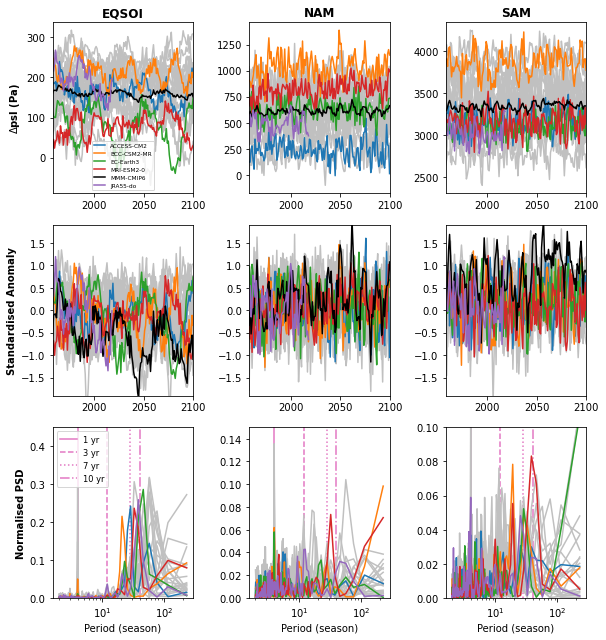

In [22]:
figure(figsize=(8.5,9))

for it in range(size(cmip6)):    
    ds = xr.open_mfdataset('../psl/r640x320/'+'indices_*_'+cmip6[it]+'_*.nc',combine='by_coords')
    ds_h = xr.open_mfdataset('../../cmip6_historical/r640x320/'+'indices_*_'+cmip6[it]+'_*.nc',combine='by_coords')

    #EQSOI
    
    #monthly-mean time series over 1958-2100
    ds_mon = concatenate((array(squeeze(ds_h.eqsoi)),array(squeeze(ds.eqsoi))))
    #seasonal-mean time series over 1958-2100
    soi_sea = mean(reshape(ds_mon,(3,(2100-1958+1)*4)),axis=0)
    #seasonal-mean climatology over 1958-2014
    ds_cli = mean(reshape(soi_sea[:(2014-1958+1)*4],(4,(2014-1958+1))),axis=1)
    #seasonal-mean anomaly over 1958-2100
    ds_ano = reshape(reshape(soi_sea,(4,(2100-1958+1))) - ds_cli[:,newaxis], 4*(2100-1958+1))
    #standardized anomaly over 1958-2100 (standardised relative to 1958-2014)
    soi_sa = ds_ano / std(ds_ano[:(2014-1958+1)*4])

    #NAM
    
    #monthly-mean time series
    ds_mon = concatenate((array(squeeze(ds_h.nam)),array(squeeze(ds.nam))))
    #seasonal-mean time series over 1958-2100
    nam_sea = mean(reshape(ds_mon,(3,(2100-1958+1)*4)),axis=0)
    #seasonal-mean climatology over 1958-2014
    ds_cli = mean(reshape(nam_sea[:(2014-1958+1)*4],(4,(2014-1958+1))),axis=1)
    #seasonal-mean anomaly over 1958-2100
    ds_ano = reshape(reshape(nam_sea,(4,(2100-1958+1))) - ds_cli[:,newaxis], 4*(2100-1958+1))
    #standardized anomaly over 1958-2100 (standardised relative to 1958-2014)
    nam_sa = ds_ano / std(ds_ano[:(2014-1958+1)*4])

    #SAM
    
    #monthly-mean time series
    ds_mon = concatenate((array(squeeze(ds_h.sam)),array(squeeze(ds.sam))))
    #seasonal-mean time series over 1958-2100
    sam_sea = mean(reshape(ds_mon,(3,(2100-1958+1)*4)),axis=0)
    #seasonal-mean climatology over 1958-2014
    ds_cli = mean(reshape(sam_sea[:(2014-1958+1)*4],(4,(2014-1958+1))),axis=1)
    #seasonal-mean anomaly over 1958-2100
    ds_ano = reshape(reshape(sam_sea,(4,(2100-1958+1))) - ds_cli[:,newaxis], 4*(2100-1958+1))
    #standardized anomaly over 1958-2100 (standardised relative to 1958-2014)
    sam_sa = ds_ano / std(ds_ano[:(2014-1958+1)*4])
    
    #because the time series is centred 3-month running mean, the first and last samples of monthly data are absent
    #so the time series starts from feb 2015 to nov 2100.
    #xtime = linspace(2015+3/24.,2100+21/24.,(2100-2015+1)*12-2)

    #monthly time series is too noisy even with 3-mohth filtering, so i will show seasonal mean instead.
    #xtime = linspace(2015+1/8.,2100+7/8.,(2100-2015+1)*4)
    #seasonal-mean is still noisy, so change to annual mean
    xtime = arange(1958,2100+1)
    
    
    if cmip6[it] == 'ACCESS-CM2':
        iro = 'tab:blue'
    elif cmip6[it] == 'BCC-CSM2-MR':
        iro = 'tab:orange'
    elif cmip6[it] == 'EC-Earth3':
        iro = 'tab:green'
    elif cmip6[it] == 'MRI-ESM2-0':
        iro = 'tab:red'
    elif cmip6[it] == 'MMM-CMIP6':
        iro = 'black'
    else:
        iro = 'silver'
    if iro == 'silver':
        raberu = '_nolabel_'
        ichi = 1
    else:
        raberu = cmip6[it]
        ichi = 2
        
    #actual pressure difference to compare the magnitude
    subplot(331)
    plot(xtime,mean(reshape(soi_sea,(4,2100-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
    subplot(332)
    plot(xtime,mean(reshape(nam_sea,(4,2100-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
    subplot(333)
    plot(xtime,mean(reshape(sam_sea,(4,2100-1958+1)),axis=0),iro,label=raberu,zorder=ichi)

    #compare the indices (standardised anomalies)
    subplot(334)
    plot(xtime,mean(reshape(soi_sa,(4,2100-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
    subplot(335)
    plot(xtime,mean(reshape(nam_sa,(4,2100-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
    subplot(336)
    plot(xtime,mean(reshape(sam_sa,(4,2100-1958+1)),axis=0),iro,label=raberu,zorder=ichi)

    if cmip6[it] == 'MMM-CMIP6':
        continue
    else:
        #spectral density
        freqs, psd = signal.welch(soi_sa[:(2014-1958+1)*4])
        subplot(337)
        semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi,label='_nolabel_')
        freqs, psd = signal.welch(nam_sa[:(2014-1958+1)*4])
        subplot(338)
        semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)
        freqs, psd = signal.welch(sam_sa[:(2014-1958+1)*4])
        subplot(339)
        semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)

#JRA55-do

ds = xr.open_mfdataset('/home/581/hh0162/data/projects/cmip/jra55v1.4.0/psl/r640x320/indices_*.nc',combine='by_coords')

#EQSOI
#monthly-mean time series
ds_mon = array(squeeze(ds.eqsoi))
#seasonal-mean time series over 1958-2018
soi_sea = mean(reshape(ds_mon,(3,(2018-1958+1)*4)),axis=0)
#seasonal-mean climatology over 1958-2014
ds_cli = mean(reshape(soi_sea[:(2014-1958+1)*4],(4,(2014-1958+1))),axis=1)
#seasonal-mean anomaly over 1958-2018
ds_ano = reshape(reshape(soi_sea,(4,(2018-1958+1))) - ds_cli[:,newaxis], 4*(2018-1958+1))
#standardized anomaly over 1958-2018 (standardised relative to 1958-2014)
soi_sa = ds_ano / std(ds_ano[:(2014-1958+1)*4])

#NAM
#monthly-mean time series
ds_mon = array(squeeze(ds.nam))
#seasonal-mean time series over 1958-2018
nam_sea = mean(reshape(ds_mon,(3,(2018-1958+1)*4)),axis=0)
#seasonal-mean climatology over 1958-2014
ds_cli = mean(reshape(nam_sea[:(2014-1958+1)*4],(4,(2014-1958+1))),axis=1)
#seasonal-mean anomaly over 1958-2018
ds_ano = reshape(reshape(nam_sea,(4,(2018-1958+1))) - ds_cli[:,newaxis], 4*(2018-1958+1))
#standardized anomaly over 1958-2018 (standardised relative to 1958-2014)
nam_sa = ds_ano / std(ds_ano[:(2014-1958+1)*4])


#SAM
#monthly-mean time series
ds_mon = array(squeeze(ds.sam))
#seasonal-mean time series over 1958-2018
sam_sea = mean(reshape(ds_mon,(3,(2018-1958+1)*4)),axis=0)
#seasonal-mean climatology over 1958-2014
ds_cli = mean(reshape(sam_sea[:(2014-1958+1)*4],(4,(2014-1958+1))),axis=1)
#seasonal-mean anomaly over 1958-2018
ds_ano = reshape(reshape(sam_sea,(4,(2018-1958+1))) - ds_cli[:,newaxis], 4*(2018-1958+1))
#standardized anomaly over 1958-2018 (standardised relative to 1958-2014)
sam_sa = ds_ano / std(ds_ano[:(2014-1958+1)*4])

#monthly time series is too noisy even with 3-mohth filtering, so i will show seasonal mean instead.
#xtime = linspace(1958+1/8.,2018+7/8.,(2018-1958+1)*4)
xtime = arange(1958,2018+1)
iro = 'tab:purple'
raberu = 'JRA55-do'
ichi = 2

#actual pressure difference to compare the magnitude
subplot(331)
plot(xtime,mean(reshape(soi_sea,(4,2018-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
subplot(332)
plot(xtime,mean(reshape(nam_sea,(4,2018-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
subplot(333)
plot(xtime,mean(reshape(sam_sea,(4,2018-1958+1)),axis=0),iro,label=raberu,zorder=ichi)

#compare the indices (standardised anomalies)
subplot(334)
plot(xtime,mean(reshape(soi_sa,(4,2018-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
ylim(-1.9,1.9)
subplot(335)
plot(xtime,mean(reshape(nam_sa,(4,2018-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
ylim(-1.9,1.9)
subplot(336)
plot(xtime,mean(reshape(sam_sa,(4,2018-1958+1)),axis=0),iro,label=raberu,zorder=ichi)
ylim(-1.9,1.9)

#spectral density
freqs, psd = signal.welch(soi_sa[:(2014-1958+1)*4])
subplot(337)
semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi,label='_nolabel_')
freqs, psd = signal.welch(nam_sa[:(2014-1958+1)*4])
subplot(338)
semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)
freqs, psd = signal.welch(sam_sa[:(2014-1958+1)*4])
subplot(339)
semilogx(1/freqs,psd/sum(psd),color=iro,zorder=ichi)
    
subplot(331)
legend(fontsize='xx-small')
title('EQSOI',fontweight='bold')
ylabel('$\Delta$psl (Pa)',fontweight='bold')
subplot(332)
title('NAM',fontweight='bold')
subplot(333)
title('SAM',fontweight='bold')
subplot(334)
ylabel('Standardised Anomaly',fontweight='bold')
subplot(337)
xlabel('Period (season)')
axvline(x=4,label='1 yr',c='tab:pink',ls='-',zorder=0)
axvline(x=12,label='3 yr',c='tab:pink',ls='--',zorder=0)
axvline(x=28,label='7 yr',c='tab:pink',ls=':',zorder=0)
axvline(x=40,label='10 yr',c='tab:pink',ls='-.',zorder=0)
legend(fontsize='smaller')
ylabel('Normalised PSD',fontweight='bold')
ylim(0,0.45)
subplot(338)
xlabel('Period (season)')
axvline(x=4,label='1 yr',c='tab:pink',ls='-',zorder=0)
axvline(x=12,label='3 yr',c='tab:pink',ls='--',zorder=0)
axvline(x=28,label='7 yr',c='tab:pink',ls=':',zorder=0)
axvline(x=40,label='10 yr',c='tab:pink',ls='-.',zorder=0)
ylim(0,0.15)
subplot(339)
xlabel('Period (season)')
axvline(x=4,label='1 yr',c='tab:pink',ls='-',zorder=0)
axvline(x=12,label='3 yr',c='tab:pink',ls='--',zorder=0)
axvline(x=28,label='7 yr',c='tab:pink',ls=':',zorder=0)
axvline(x=40,label='10 yr',c='tab:pink',ls='-.',zorder=0)
ylim(0,0.1)


for it in range(6):
    subplot(3,3,it+1)
    xlim(1958,2100)

tight_layout()
savefig('fig_indices_CMIP6_SSP585.pdf',dpi=300,bbox_tight='True')

### 20200916: we need to understand the how array is allocated when "reshaped".

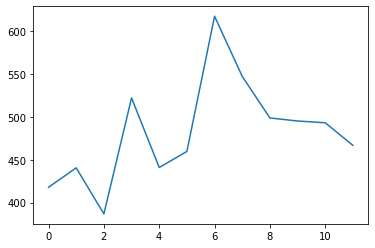

In [13]:
ds_cli = mean(reshape(nam_sea[:(2014-1958+1)*12],(12,(2014-1958+1))),axis=1)
plot(ds_cli)

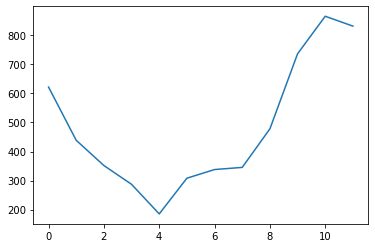

In [18]:
ds_cli = mean(reshape(nam_sea[:(2014-1958+1)*12],((2014-1958+1),12)),axis=0)
plot(ds_cli)